## Compare CO$_2$ HITRAN and HITEMP

⚠️ *HITEMP CO2 computations require a lot of RAM. RADIS-Lab is lucky to be hosted on a https://notebooks.gesis.org binder with 8 GB RAM, which should be enough for medium-size ranges ! For large ranges, see the [Calculate a large spectrum](https://radis.readthedocs.io/en/latest/auto_examples/plot_merged_large_spectrum.html#sphx-glr-auto-examples-plot-merged-large-spectrum-py) on Radis documentation* 

Compare the asymmetric stretching band  of CO2 (the 2400 cm-1 / 4.2 µm band), at various temperatures from 300 to 3500 K, in the HITRAN and HITEMP databases. If using these databases in your work, remember [to cite them](https://radis.readthedocs.io/en/latest/references/references.html#line-databases).

For any help, refer to [RADIS documentation](https://radis.readthedocs.io) 

---

First let's initialize our RADIS environment, and the calculation conditions : 

## Databases 

The HITRAN database will be automatically downloaded. The HITEMP database files for CO2 have been preconfigured in the RADIS [~/radis.json](../radis.json) config file. You can see the list of preconfigured databases with `printDatabankList`: 


In [1]:
from radis.misc.config import printDatabankList
printDatabankList()

Databanks in /home/jovyan/radis.json:  HITEMP2010-CO2,HITEMP2010-H2O


'HITEMP2010-CO2':
{'info': 'HITEMP2020 CO2 lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium) ', 'path': ['/home/jovyan/databases/HITEMP/CO2/*.par'], 'format': 'hitemp', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis'} 



'HITEMP2010-H2O':
{'info': 'HITEMP2020 H2O lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium) ', 'path': ['/home/jovyan/databases/HITEMP/H2O/*.par'], 'format': 'hitemp', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis'} 



### Calculations

Let's initialize the plot environment, and choose some conditions for all the calculations : 

In [2]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on download.
%matplotlib inline

from astropy import units as u
conditions = {"wavenum_min": 2000 / u.cm, 
              "wavenum_max": 4000 / u.cm,
              "molecule":'CO2',
              "isotope":'1,2,3',
              "pressure":1.01325 * u.bar,
              "mole_fraction":1,
              "path_length":1 * u.cm,
             }


Now let's calculate the spectra with [calc_spectrum](https://radis.readthedocs.io/en/latest/source/radis.lbl.calc.html#radis.lbl.calc.calc_spectrum) 

In [3]:
from radis import calc_spectrum
# CO2 HITRAN
s_tran = calc_spectrum(**conditions,
                       Tgas=300, 
                       databank='hitran',  # HITRAN automatically downloaded
                       name="HITRAN"
                      )
# without verbose=False this will show all the input parameters. 
# With verbose=2,3,etc... we get increasing number of details about the calculation. 

Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_1_1995.00_4005.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_2_1995.00_4005.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_3_1995.00_4005.01.h5
HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005
Calculating Equilibrium Spectrum
Physical Conditio

Now let's compute with HITEMP. 

⚠️ *The first computation may take a lot of time to generate .hdf5 [cache files](https://radis.readthedocs.io/en/latest/source/radis.misc.cache_files.html) from the HITEMP files. At this point this is not yet done while setting up the databases. The spectrum calculation itself will be extremelly fast for the rest of your session !*

In [4]:
# CO2 HITEMP
s_temp = calc_spectrum(**conditions,
                       Tgas=300, 
                       databank='HITEMP2010-CO2',  # HITRAN automatically downloaded
                       name="HITEMP2019"
                      )

Using database: HITEMP2010-CO2
'HITEMP2010-CO2':
{'info': 'HITEMP2020 CO2 lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium) ', 'path': ['/home/jovyan/databases/HITEMP/CO2/*.par'], 'format': 'hitemp', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis'} 



Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1,2,3
   mole_fraction        1
   molecule             CO2
   path_length          1.0 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          4000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    f

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))


Spectrum calculated in 8.23s


Plot the difference with [plot_diff](https://radis.readthedocs.io/en/latest/source/radis.spectrum.compare.html#radis.spectrum.compare.plot_diff)

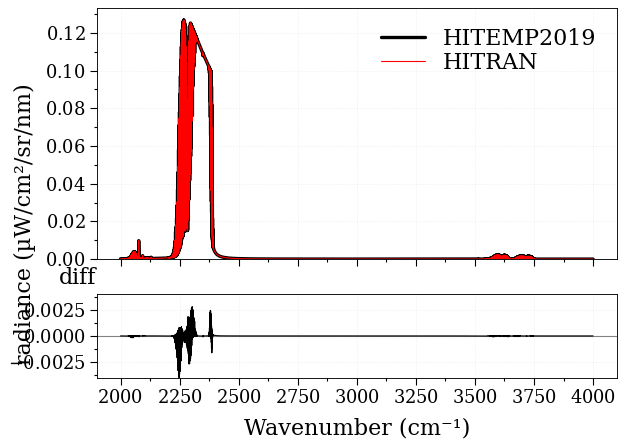

(<Figure size 640x480 with 2 Axes>,
 [<AxesSubplot:>, <AxesSubplot:xlabel='Wavenumber (cm⁻¹)'>])

In [5]:
from radis import plot_diff
plot_diff(s_temp, s_tran, Iunit='µW/cm2/sr/nm')

### Comparison for various temperatures 

Let's make a loop : 

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))


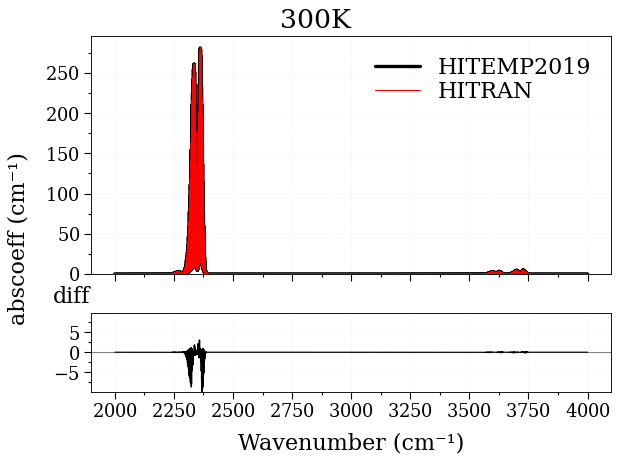

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))


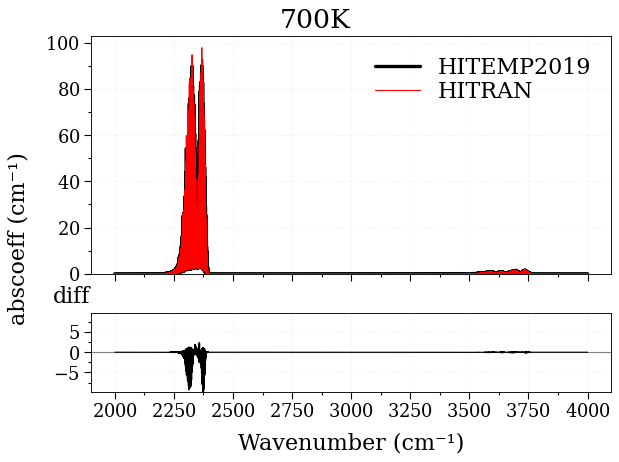

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))


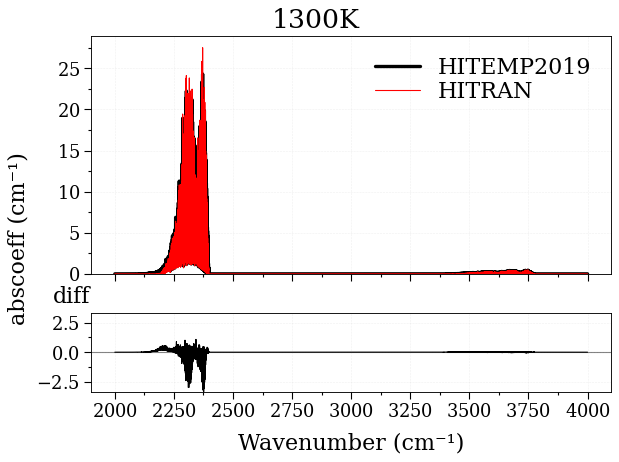

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))
/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.023 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0077 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


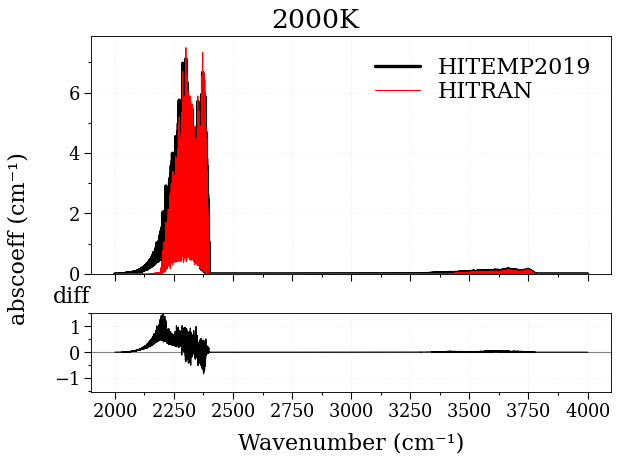

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.029 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0098 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))
/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))
/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0062 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningTyp

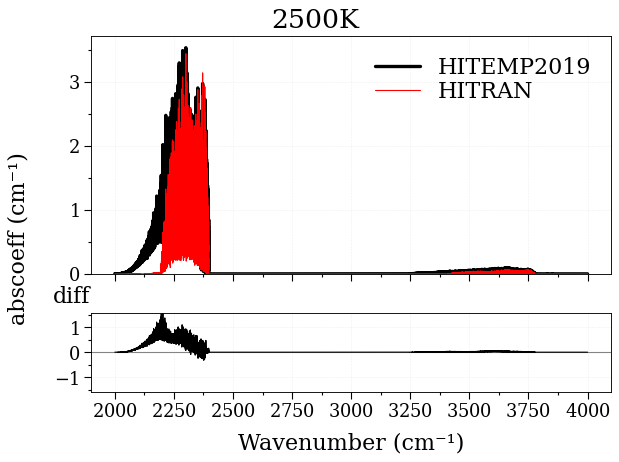

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.026 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0086 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))
/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))
/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.016 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0053 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningTyp

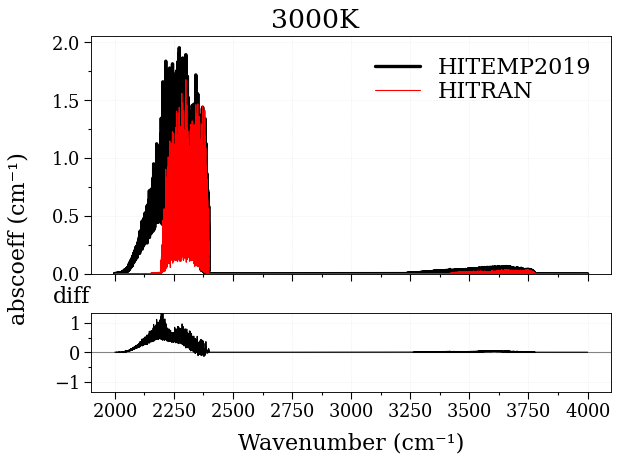

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.023 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0077 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))
/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: MemoryUsageWarning: Line database is large: 843 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))
/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.014 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0046 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningTyp

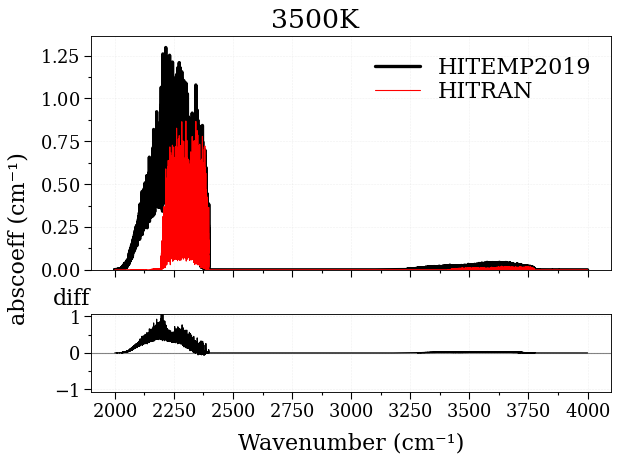

In [6]:
conditions.update({
    "warnings":{
            "MissingSelfBroadeningWarning": "ignore", # HITRAN has no temperature dependance for resonant-broadening
            "HighTemperatureWarning": "ignore", # HITRAN at high temperature is not valid and will trigger warnings. 
        },
    "verbose": False,  # no need to print calculation details 
})
    

for Tgas in [300, 700, 1300, 2000, 2500, 3000, 3500]:
    s_tran = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank='hitran',  # HITRAN automatically downloaded
                           name="HITRAN")
    s_temp = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank="HITEMP2010-CO2",
                           name="HITEMP2019")
    plot_diff(s_temp, s_tran, 'abscoeff', title=f"{Tgas}K")